In [26]:
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns   


In [27]:
git_link = 'https://github.com/geojoseph19/FakeFinder/raw/master/Datasets/Combined/insta_dataset.csv'
dataset = pd.read_csv(git_link)

Epoch 1/10
18/18 [==============================] - 5s 18ms/step - loss: 0.6692 - accuracy: 0.6223
Epoch 2/10
18/18 [==============================] - 0s 17ms/step - loss: 0.6175 - accuracy: 0.6475
Epoch 3/10
18/18 [==============================] - 0s 15ms/step - loss: 0.5748 - accuracy: 0.6817
Epoch 4/10
18/18 [==============================] - 0s 11ms/step - loss: 0.5370 - accuracy: 0.7086
Epoch 5/10
18/18 [==============================] - 0s 10ms/step - loss: 0.4825 - accuracy: 0.7626
Epoch 6/10
18/18 [==============================] - 0s 15ms/step - loss: 0.4154 - accuracy: 0.8237
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 0.3869 - accuracy: 0.8219
Epoch 8/10
18/18 [==============================] - 0s 17ms/step - loss: 0.3736 - accuracy: 0.8309
Epoch 9/10
18/18 [==============================] - 0s 14ms/step - loss: 0.3635 - accuracy: 0.8381
Epoch 10/10
5/5 [==============================] - 2s 11ms/step - loss: 0.2311 - accuracy: 0.9286
Test loss: 

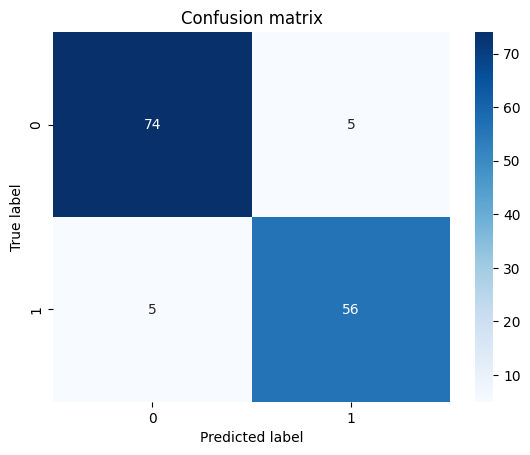

In [32]:
# Import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = dataset

# Preprocess data
numerical_cols = ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows']
X = df[numerical_cols]
y = df['fake']

# Normalize numerical variables
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=40)

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

# Evaluate LSTM model on test data
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

y_pred = model.predict(X_test_reshaped)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_class)
classification_report = classification_report(y_test, y_pred_class)
confusion_matrix = confusion_matrix(y_test, y_pred_class)
print(classification_report)

# Plot heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [25]:
"""username = input("Username : ")
p_name = input("Profile name : ")
flwrs = int(input("No. of followers : "))
flwing = int(input("No. of following : "))
posts = int(input("No. of posts : "))
bio = input("Bio : ")
ext_url = int(input("External url (1/0) : "))
actype = input("Account type (pub/pri): ") 
ppic = int(input("Profile picture availability (1/0) : ")) """

"""
#fakeac
username = "artistpng"
p_name = "Creative Soul"
flwrs = 98
flwing = 2727
posts = 10
bio = ""
ext_url = 0
actype = 0
ppic = 1

"""

"""
#ogac
username = "geojoseph19"
p_name = "Geo Joseph"
flwrs = 2596
flwing = 910
posts = 54
bio = " 𝐗𝐈𝐗 RIT'23 ~Reality is an illusion~ 🛠️ @geoaudio"
ext_url = 1
actype = 0
ppic = 1 
"""

"""
#ogac
username = "yamuna_krishna01"
p_name = "Yamuna Krishna"
flwrs = 383
flwing = 302
posts = 1
bio = "🌸It Is During Our Darkest Moments That We Must Focus To See The Light 🌸 ♏ Ex IHRDian❤️RiTian 💻..... Wish me on Nov 09 🎂"
ext_url = 0
actype = 1
ppic = 1 
"""

#ogac
username = "_sonyantony_"
p_name = "Sony Antony"
flwrs = 309
flwing = 742
posts = 124
bio = "💫 Personal space 🔸📎 Main account @__gokul_krishnan___"
ext_url = 0
actype = 1
ppic = 1 


In [18]:
#Finding username numbers ratio
username = "john123"
ratio_numusername = 0

for char in username:
    if char.isdigit():
        ratio_numusername += 1

u_ratio = ratio_numusername / len(username)


#full name words count
pname_count = len(p_name.split())

#ratio of number of numerical characters in profile name to its length
ratio_numpname = 0

for char in p_name:
    if char.isdigit():
        ratio_numpname += 1

p_ratio = ratio_numpname / len(p_name)

#bio length
bio_len = len(bio)

#name==username
if username == p_name :
  nu = 1
else:
  nu =0

  pic = 1

#account type
actype = str(actype)
if actype.lower == "pub":
  actype = 0
else:
  actype = 1

In [19]:
ext_url = int(ext_url)

data = [[pic, u_ratio, pname_count, p_ratio, nu, bio_len, ext_url, actype, posts, flwrs, flwing]]

print(data)

vp = pd.DataFrame( data , columns = ['profile pic', 'nums/length username','fullname words','nums/length fullname','name==username','description length',
                                    'external URL','private','#posts','#followers','#follows'])


# Load new data
new_data = vp

# Preprocess new data
X_new = new_data[numerical_cols]
X_new_normalized = scaler.transform(X_new)
X_new_reshaped = np.reshape(X_new_normalized, (X_new_normalized.shape[0], X_new_normalized.shape[1], 1))

# Make predictions on new data
predictions = model.predict(X_new_reshaped)

# Print predictions
print(predictions)

# Make binary predictions on new data
binary_predictions = (predictions >= 0.5).astype(int)

# Print binary predictions
print(binary_predictions)


#print(dataset.iloc[674])

[[1, 0.42857142857142855, 2, 0.0, 0, 53, 0, 1, 124, 309, 742]]
1/1 [==============================] - 0s 27ms/step
[[0.5822409]]
[[1]]


In [2]:

import requests
from bs4 import BeautifulSoup


# The URL of the Instagram profile
url = "https://privatephotoviewer.com/usr/geojoseph19"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")


print(soup)








<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link crossorigin="anonymous" href="https://use.fontawesome.com/releases/v5.8.1/css/all.css" integrity="sha384-50oBUHEmvpQ+1lW4y57PTFmhCaXp0ML5d60M1M7uH2+nqUivzIebhndOJK28anvf" rel="stylesheet"/>
<link href="https://avatars2.githubusercontent.com/u/38456916?s=460&amp;u=7db06c46c3c24a2cf19cb793aa8fbb24aedf18d0&amp;v=4" rel="shortcut icon" type="image/x-icon"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.3/umd/popper.min.js"></script>
<link href="https://privatephotoviewer.com/css/style.css" rel="stylesheet"/>
<title>@geojoseph19 Geo Joseph Instagram Profile</title>
<meta content="Watch @geojoseph19- Instagram Photos &amp; Videos  " name="description">
<meta content=" @geojoseph19- On Instagram  " name="keywords">
<script async="" src="https: